# Simulación de Cirtuito de 3 Qubits con Compuerta Cuántica de Hadamard y CNOT en Python

### Téllez García Gabriela

## Dependencias y Librerías

In [2]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ, BasicAer, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector, Operator, partial_trace
from qiskit.visualization import array_to_latex, plot_histogram

## Circuito 3 Qubits

In [3]:
# Asignaciñon de qubits
qubits=3
# Convercion del circuito cuantico
circuito = QuantumCircuit(qubits)
# Agregado de compuerta de Hadamard  en qubit 0
circuito.h(0)
# Agregado de compuerta CNOT  en qubit 0 t target 1 
circuito.cx(0, 1)
# Agregado de compuerta CNOT en qubit 0 t target 2 
circuito.cx(0, 2)

print(circuito)

     ┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘


## Vector de Estado

In [4]:
# Asignamos el estado inicial del vector
estadoQ = Statevector.from_int(0, 2**qubits)

# Convertimos el estado actual (bits) a estado cuantico (qubits)
estadoQ = estadoQ.evolve(circuito)
estadoLista= []

estadoQ.draw('latex')

<IPython.core.display.Latex object>

O también: 

In [5]:
array_to_latex(estadoQ)

<IPython.core.display.Latex object>

## Modelo Q-Sphere 

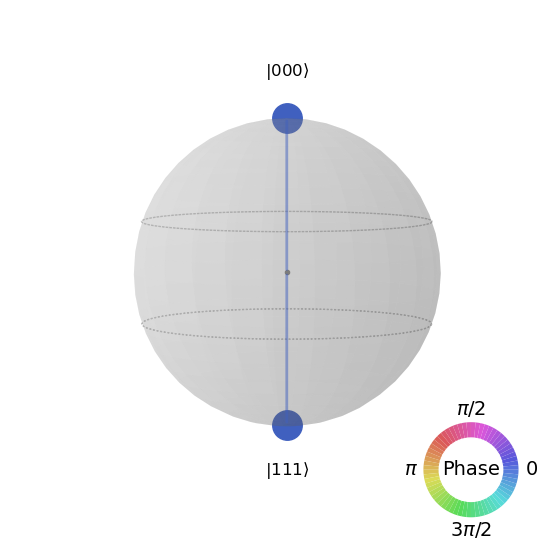

In [6]:
estadoQ.draw('qsphere')

## Diagrama de Hinton

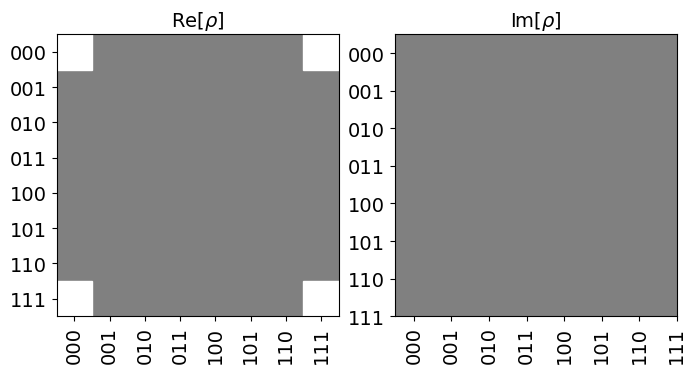

In [7]:
estadoQ.draw('hinton')

## Representación Unitaria

In [8]:
# Para crear una representacion, se debe generar mediante la funcion Operator, agregando el circuito
Unitaria = Operator(circuito)

# La función se encarga de crearla, generando un array.
Unitaria.data


array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

## Simulador de probabilidad 

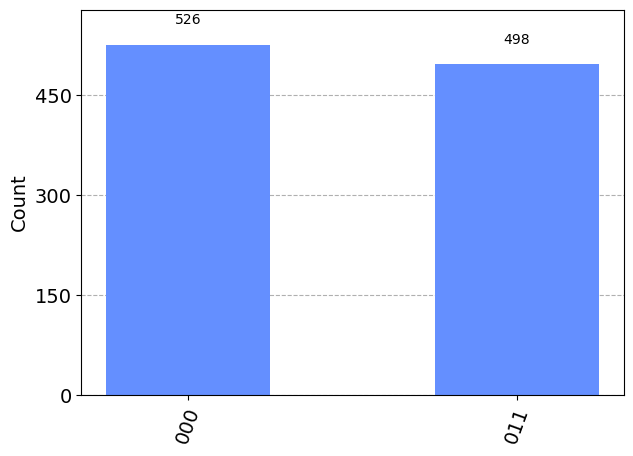

In [10]:
# Para obtener la probabilidad de que sea 000 o 011, se debe generar un  circuito clasico con valores cuanticos y clasicos 
q = QuantumRegister(qubits)
c= ClassicalRegister(qubits)

# Posteriomente se asignan al generadode de circuito
circuitoClasico = QuantumCircuit(q, c)

# Puerta logica de Hadamard asignada en el primer qubit 
circuitoClasico.h(q[0])
# Puerta CNOT asignada en el primer y segundo qubit
circuitoClasico.cx(q[0], q[1])
# Medición de qubits
circuitoClasico.measure(q, c)

# Se hace la simulación mediante el algoritmo de qasm_simulator
simulador = BasicAer.get_backend('qasm_simulator')
job = execute(circuitoClasico, simulador)
resultado = job.result()

# Se cuentan los resultados
total = resultado.get_counts(circuitoClasico)

plot_histogram(total)